In [3]:
!pip install imgaug

In [4]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline

# Displaying the original image

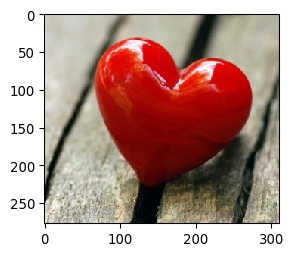

In [10]:
image = imageio.imread("love.png")
ia.imshow(image)

# Rotating the image

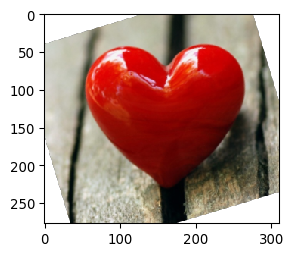

In [11]:
rotate=iaa.Affine(rotate=(-50, 30))
rotated_image=rotate.augment_image(image)
ia.imshow(rotated_image)

# Adding noise to the image

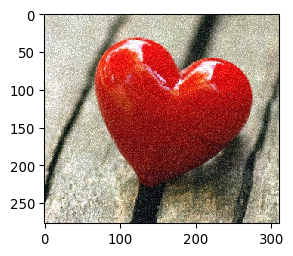

In [12]:
gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
noise_image=gaussian_noise.augment_image(image)
ia.imshow(noise_image)

# Cropping the image

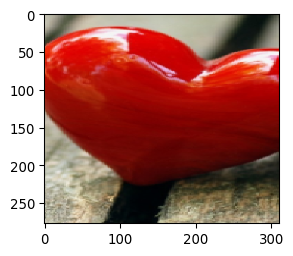

In [13]:
crop = iaa.Crop(percent=(0, 0.3)) # crop image
corp_image=crop.augment_image(image)
ia.imshow(corp_image)

# Shearing the image

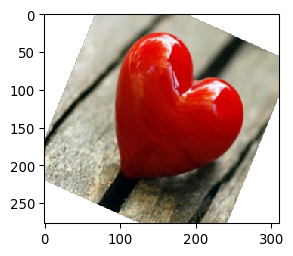

In [14]:
shear = iaa.Affine(shear=(0,40))
shear_image=shear.augment_image(image)
ia.imshow(shear_image)

# Flipping the image

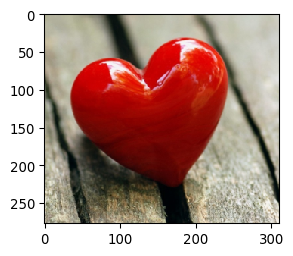

In [15]:
#flipping image horizontally
flip_hr=iaa.Fliplr(p=1.0)
flip_hr_image= flip_hr.augment_image(image)
ia.imshow(flip_hr_image)

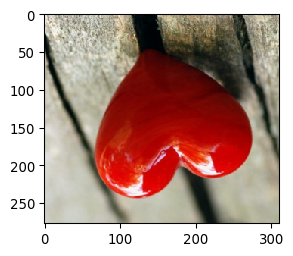

In [16]:
flip_vr=iaa.Flipud(p=1.0)
flip_vr_image= flip_vr.augment_image(image)
ia.imshow(flip_vr_image)

# Changing the brightness of the image

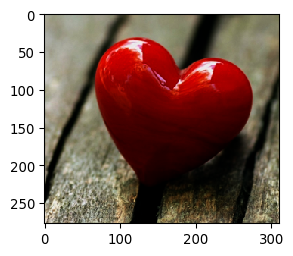

In [17]:
image = imageio.imread('C:/Users/79280/Desktop/123456/Screenshot_10.png')
contrast=iaa.GammaContrast(gamma=2.0)
contrast_image =contrast.augment_image(image)
ia.imshow(contrast_image)

# Scaling the image

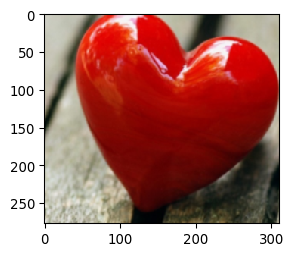

In [23]:
image = imageio.imread("C:/Users/79280/Desktop/123456/Screenshot_10.png")
scale_im=iaa.Affine(scale={"x": (1.5, 1.0), "y": (1.5, 1.0)})
scale_image =scale_im.augment_image(image)
ia.imshow(scale_image)

# Augmentation for object detection

In [24]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [25]:
bbs = BoundingBoxesOnImage([
 BoundingBox(x1=10, x2=520, y1=10, y2=300)
], shape=image.shape)

In [26]:
ia.imshow(bbs.draw_on_image(image, size=2))

ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (568,4)

In [27]:
move=iaa.Affine(translate_percent={"x": 0.1}, scale=0.8)
image_aug, bbs_aug = move(image=image, bounding_boxes=bbs)
ia.imshow(bbs_aug.draw_on_image(image_aug, size=2))

ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (715,4)

# Handling Bounding boxes outside the image after applying image augmentation

In [28]:
rotate_bb=iaa.Affine(rotate=(-50, 30))
image_aug, bbs_aug = rotate_bb(image=image, bounding_boxes=bbs)
ia.imshow(bbs_aug.draw_on_image(image_aug, size=2))


ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (0,4)

In [29]:
def pad(image, by):
    image_border1 = ia.pad(image, top=1, right=1, bottom=1, left=1,
                           mode="constant", cval=255)
    image_border2 = ia.pad(image_border1, top=by-1, right=by-1,
                           bottom=by-1, left=by-1,
                           mode="constant", cval=0)
    return image_border2

In [30]:
def draw_bbs(image, bbs, border):
    GREEN = [0, 255, 0]
    ORANGE = [255, 140, 0]
    RED = [255, 0, 0]
    image_border = pad(image, border)
    for bb in bbs.bounding_boxes:
        if bb.is_fully_within_image(image.shape):
            color = GREEN
        elif bb.is_partly_within_image(image.shape):
            color = ORANGE
        else:
            color = RED
        image_border = bb.shift(left=border, top=border)\
                         .draw_on_image(image_border, size=2, color=color)
return image_border

SyntaxError: 'return' outside function (<ipython-input-30-033a7a9da0f8>, line 15)

In [31]:
rotate=iaa.Affine(rotate=(-50, 30))
image_aug, bbs_aug = rotate(image=image, bounding_boxes=bbs)
image_after = draw_bbs(image_aug, bbs_aug.remove_out_of_image().clip_out_of_image(), 100)
ia.imshow(image_after)

C:\Users\79280\anaconda3\lib\site-packages\imgaug\imgaug.py:106: DeprecationWarning: Using imgaug.imgaug.pad is deprecated. Use imgaug.augmenters.size.pad instead.
  warn(msg, category=DeprecationWarning, stacklevel=stacklevel)
C:\Users\79280\anaconda3\lib\site-packages\imgaug\augmentables\utils.py:354: DeprecationWarning: Got one of the arguments `top` (100), `right` (None), `bottom` (None), `left` (100) in a shift() call. These are deprecated. Use `x` and `y` instead.
  stacklevel=3)


ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (1180,4)

# Shearing the image

# Flipping the image

# Changing the brightness of the image

# Scaling the image

# Augmentation for object detection

# Handling Bounding boxes outside the image after applying image augmentation